#Gerando Circuito Aleatório

C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


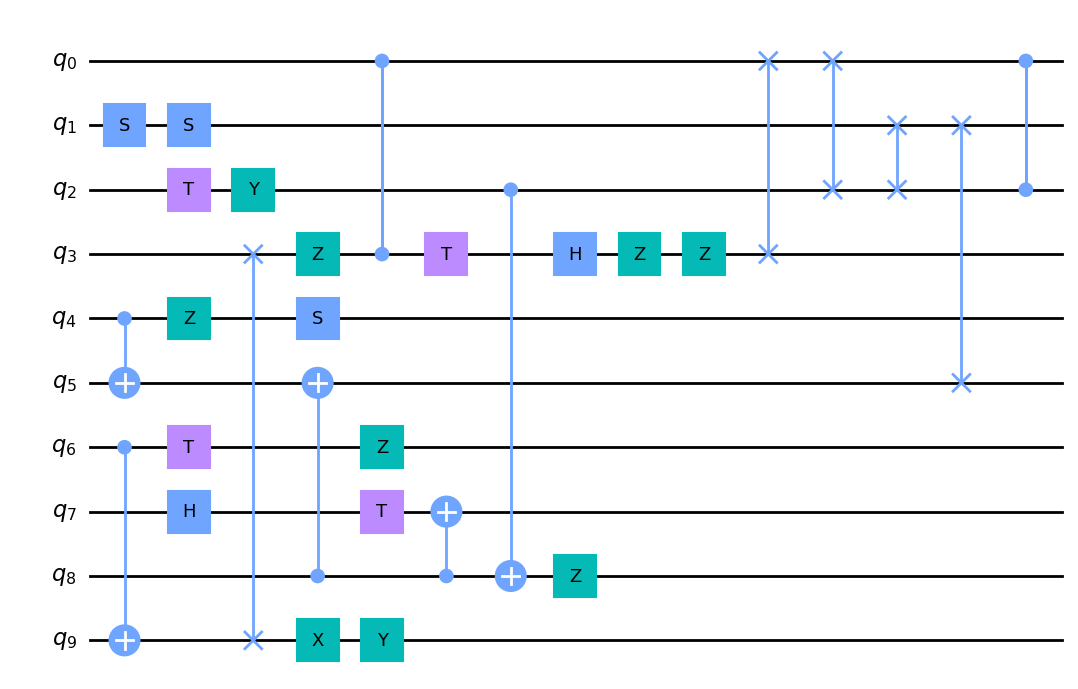

In [2]:
# Import necessary modules from Qiskit
import random
from qiskit import QuantumCircuit

# Create a 10-qubit quantum circuit
num_qubits = 10
qc = QuantumCircuit(num_qubits)

# Define a list of possible gates to apply randomly
single_qubit_gates = ['h', 'x', 'y', 'z', 's', 't']
two_qubit_gates = ['cx', 'cz', 'swap']

# Number of random gates to apply
num_gates = 30

for _ in range(num_gates):
    # Randomly choose to apply either a single or two-qubit gate
    gate_type = random.choice(['single', 'two'])

    if gate_type == 'single':
        # Randomly select a single-qubit gate and the qubit to apply it on
        gate = random.choice(single_qubit_gates)
        qubit = random.randint(0, num_qubits - 1)

        # Apply the chosen single-qubit gate
        if gate in ['h', 'x', 'y', 'z', 's', 't']:
            getattr(qc, gate)(qubit)

    elif gate_type == 'two':
        # Randomly select a two-qubit gate and two qubits to apply it on
        gate = random.choice(two_qubit_gates)
        qubit1 = random.randint(0, num_qubits - 1)
        qubit2 = random.randint(0, num_qubits - 1)

        # Ensure qubit1 and qubit2 are different
        while qubit1 == qubit2:
            qubit2 = random.randint(0, num_qubits - 1)

        # Apply the chosen two-qubit gate
        if gate == 'cx':
            qc.cx(qubit1, qubit2)
        elif gate == 'cz':
            qc.cz(qubit1, qubit2)
        elif gate == 'swap':
            qc.swap(qubit1, qubit2)

# Draw the quantum circuit
qc.draw('mpl')


#Mostrando as Instruções

In [2]:
def print_all_instructions(circuit):
    # Loop through the instructions in the quantum circuit
    for i, instruction in enumerate(circuit.data):
        operation = instruction.operation  # The gate/operation applied
        qubits = instruction.qubits  # The qubits the operation is applied to

        # Prepare a list of qubit names and their positions in the QuantumRegister
        qubit_labels = [f"{qubit}" for qubit in qubits]

        # Print the information about the instruction
        print(f"Instruction {i}:")
        print(f"  Operation: {operation.name}")
        print(f"  Qubits: {', '.join(qubit_labels)}")
        
        # If the operation has parameters (e.g., rotation angles), print them
        if operation.params:
            print(f"  Parameters: {operation.params}")
        print()






# Assuming `qc` is your quantum circuit
print_all_instructions(qc)


Instruction 0:
  Operation: h
  Qubits: Qubit(QuantumRegister(10, 'q'), 2)

Instruction 1:
  Operation: swap
  Qubits: Qubit(QuantumRegister(10, 'q'), 4), Qubit(QuantumRegister(10, 'q'), 9)

Instruction 2:
  Operation: cz
  Qubits: Qubit(QuantumRegister(10, 'q'), 1), Qubit(QuantumRegister(10, 'q'), 9)

Instruction 3:
  Operation: x
  Qubits: Qubit(QuantumRegister(10, 'q'), 1)

Instruction 4:
  Operation: cx
  Qubits: Qubit(QuantumRegister(10, 'q'), 0), Qubit(QuantumRegister(10, 'q'), 2)

Instruction 5:
  Operation: y
  Qubits: Qubit(QuantumRegister(10, 'q'), 2)

Instruction 6:
  Operation: h
  Qubits: Qubit(QuantumRegister(10, 'q'), 9)

Instruction 7:
  Operation: x
  Qubits: Qubit(QuantumRegister(10, 'q'), 2)

Instruction 8:
  Operation: cx
  Qubits: Qubit(QuantumRegister(10, 'q'), 4), Qubit(QuantumRegister(10, 'q'), 0)

Instruction 9:
  Operation: y
  Qubits: Qubit(QuantumRegister(10, 'q'), 1)

Instruction 10:
  Operation: s
  Qubits: Qubit(QuantumRegister(10, 'q'), 8)

Instruction 1

In [3]:

# Function to save all the instructions to a list
def save_instructions(circuit):
    saved_instructions = []
    
    # Loop through the instructions in the quantum circuit
    for i, instruction in enumerate(circuit.data):
        operation = instruction.operation.name  # The gate/operation applied
        qubits = instruction.qubits  # The qubits the operation is applied to
        params = instruction.operation.params  # Parameters for gates like rotations
        
        # Save each instruction as a dictionary with operation, qubits, and parameters
        saved_instructions.append({
            'operation': operation,
            'qubits': qubits,
            
        })
        
    return saved_instructions

In [4]:
saved_instructions= save_instructions(qc)

Agora, Simulando no Servidor. Recriando o Código dado as instruções enviadas

In [5]:
# Function to recreate a quantum circuit from the saved instructions
def recreate_circuit(saved_instructions, num_qubits):
    new_qc = QuantumCircuit(num_qubits)  # Create a new quantum circuit with the same number of qubits
    
    # Loop through the saved instructions and apply each gate to the new circuit
    for instruction in saved_instructions:
        operation = instruction['operation']
        qubits = instruction['qubits']
        # Apply the operation to the new circuit based on the type of gate and its parameters
        if operation in ['h', 'x', 'y', 'z', 's', 't']:
            # Single-qubit gates without parameters
            getattr(new_qc, operation)(qubits[0])
        elif operation == 'cx':
            # Controlled X gate (CNOT)
            new_qc.cx(qubits[0], qubits[1])
        elif operation == 'cz':
            # Controlled Z gate
            new_qc.cz(qubits[0], qubits[1])
        elif operation == 'swap':
            # Swap gate
            new_qc.swap(qubits[0], qubits[1])
    
    return new_qc


In [6]:
recreated_qc= recreate_circuit(saved_instructions, num_qubits )

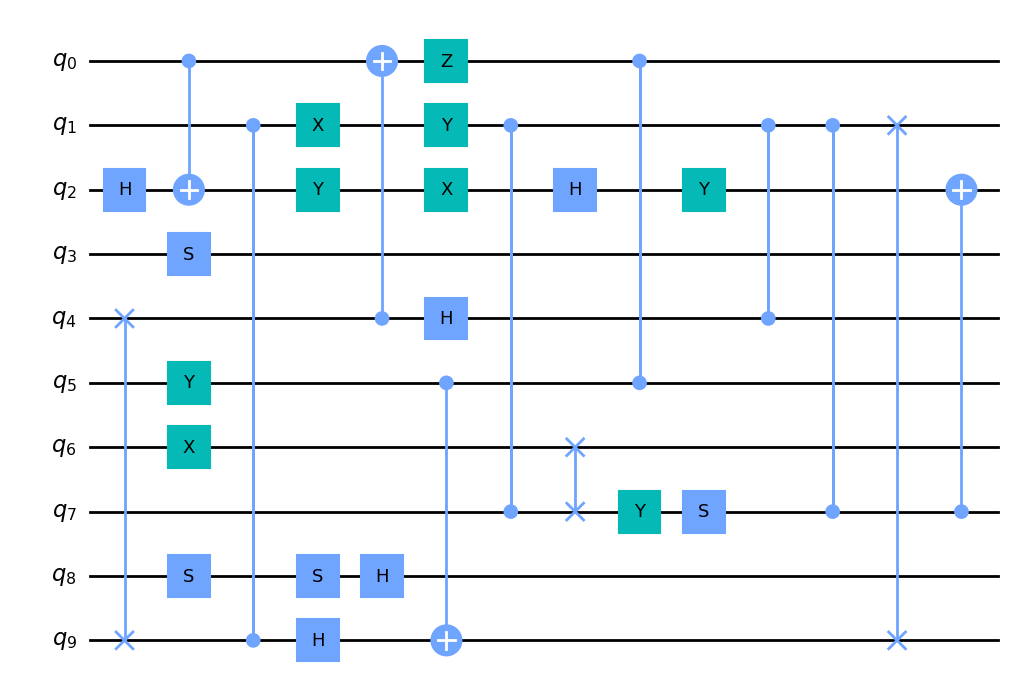

In [7]:
recreated_qc.draw('mpl')